In [6]:
VISICUT_LOCATION = '/Users/vwn277/projects/fedtlike/visicut/VisiCut.MacOS'

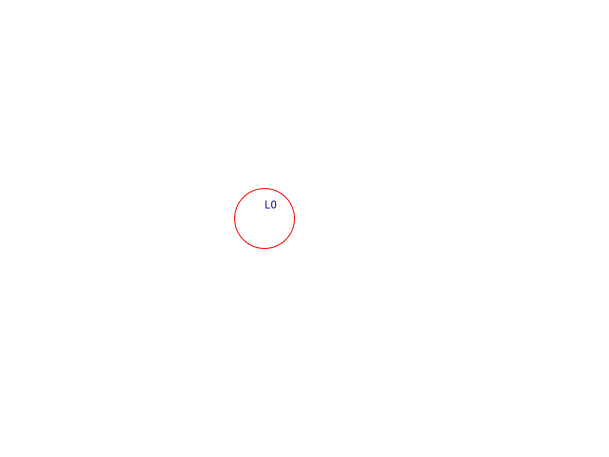

In [2]:
import drawsvg as draw

laser_bed = {
    'width': 24 * 2.54 * 10, # in mm
    'height': 18 * 2.54 * 10 # in mm
}

def create_labelled(drawing_function, label = "L0", label_location = (0,0), svg_location = "./"):
    d = draw.Drawing(laser_bed['width'], laser_bed['height'], origin='center', displayInline=False)
    
    drawing_function(d)

    d.append(draw.Text(x=label_location[0], y=label_location[1], fill='blue', text=label, font_size=10))

    svg_location = svg_location + label + '.svg'
    d.save_svg(svg_location)
    #d.savePng('example.png')
    
    # Display in Jupyter notebook
    #d.rasterize()  # Display as PNG
    return d, svg_location  # Display as SVG

def drawCircle(d):
    d.append(draw.Circle(-40, -10, 30,
                fill='none', stroke_width=1, stroke='red'))

d, svg = create_labelled(drawCircle, label_location=(-40,-20))
d

In [8]:
import os
import subprocess
from zipfile import ZipFile

def execute_lasercut(cut_file, laserdevice="Epilog Helix", mapping_file="mappings.xml"):
    # make the svg into the .plf file that they like
    temp_zf = 'spam.zip'
    with ZipFile(temp_zf, 'w') as myzip:
        myzip.write(cut_file)
        myzip.write(mapping_file)
        myzip.write("transform.xml")
    temp_plf = temp_zf.replace('.zip','.plf')
    os.rename(temp_zf, temp_plf)
    cut_command = [VISICUT_LOCATION,
                   '--laserdevice ' + laserdevice,
                   '--execute',
                   temp_plf]
    results = subprocess.check_output(cut_command)
    os.remove(temp_plf)
    return results

execute_lasercut(svg)

openjdk version "17.0.6" 2023-01-17
OpenJDK Runtime Environment Temurin-17.0.6+10 (build 17.0.6+10)
OpenJDK 64-Bit Server VM Temurin-17.0.6+10 (build 17.0.6+10, mixed mode)
Unknown command line option: --laserdevice Epilog Helix
Use -h or --help for help


CalledProcessError: Command '['/Users/vwn277/projects/fedtlike/visicut/VisiCut.MacOS', '--laserdevice Epilog Helix', '--execute', 'spam.plf']' returned non-zero exit status 1.